In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm
import os
sns.set_style('ticks')

%matplotlib inline

Импортируем данные без лишних фокусов

In [2]:
data = pd.read_csv('C:/Users/dmitr/Desktop/Metrics_HW/forestfires.csv')

In [3]:
data[data.area>0].groupby('month')['area'].count()

month
apr     4
aug    99
dec     9
feb    10
jul    18
jun     8
mar    19
may     1
oct     5
sep    97
Name: area, dtype: int64

Чаще всего пожары происходят в начале осени (август, сентябрь)

Описание переменных из источника:
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC (Fine Fuel Moisture Code) from the FWI system: 18.7 to 96.20
6. DMC - DMC (Duff Moisture Code) from the FWI system: 1.1 to 291.3
7. DC - DC (Drought Code) from the FWI system: 7.9 to 860.6
8. ISI - ISI (Initial Spread Index) from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84


In [4]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
data.shape

(517, 13)

Убираем наблюдения с нулевой в площадью, как указано в задании

In [6]:
data = data.drop(data[data.area == 0].index)

In [7]:
data = data.reset_index() #новая нумерация наблюдений
data = data.drop('index', 1) #убираем старые индексы
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36
1,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43
2,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47
3,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55
4,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61


В датасете есть метки времени в формате `string`. Преобразуем столбец `month` по временам года:

In [8]:
data.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [9]:
months = {'jan':0, 'feb':0, 'mar':0, 'apr':1, 'may':1, 'jun':2, 'jul':2, 'aug':2, 'sep':3, 'oct':3, 'nov':3, 'dec':0}

In [10]:
fire_season={'jan':0, 'feb':0, 'mar':0, 'apr':0, 'may':0, 'jun':0, 'jul':0, 'aug':1, 'sep':1, 'oct':0, 'nov':0, 'dec':0}

In [11]:
data['season'] = data['month'].map(months)

In [12]:
data['fire_season'] = data['month'].map(fire_season)

In [13]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,season,fire_season
0,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,2,0
1,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,3,1
2,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,3,1
3,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,2,1
4,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,2,1


Однако, в таком виде мы использовать такие данные не можем. Создадим dummy-переменные для этой категориальной переменной

In [14]:
data1 = pd.get_dummies(data['season'])
data1.columns = ['win', 'spr', 'sum', 'aut']
data1 = data1.drop('aut', axis = 1) #обходим dummy trap
data = data.join(data1)

In [15]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,season,fire_season,win,spr,sum
0,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,2,0,0,0,1
1,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,3,1,0,0,0
2,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,3,1,0,0,0
3,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,2,1,0,0,1
4,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,2,1,0,0,1


Прологарифмируем значение переменной (`area`+1) 

In [16]:
data['area'] = np.log(data['area']+1)

Заметим, что 89 пожар из 270 произошёл на выходных => возможно существует взаимосвязь между действиями португальского аналога российских любителей шашлыка и пожарами

In [17]:
data[(data.day=='sat')| (data.day=='sun')]['day'].count()

89

Создадим дамми `is_weekend`

In [18]:
weekend={'mon':0, 'tue':0, 'wed':0, 'thu':0, 'fri':0, 'sat':1, 'sun':1}

In [19]:
data['is_weekend']=data['day'].map(weekend)

Отбор переменных  
`area` в качестве зависимой переменной (логарифмированная и сдвинутая на +1, чтобы избежать отрицательные значения)  
`FFMC` -> индекс воспламеняемости легкогоряючих веществ. Ожидаем положительный эффект на `area`  
`DMC`-> средняя влажность верхних слоев почвы. Ожидаем отрицательный эффект.    
`DC` -> средняя влажность нижних слоев почвы (полезно для учета сезонной засухи). Ожидаем отрицательный эффект.    
`ISI`-> ожидаемый рейтинг распространения огня. Ожидаем положительный эффект.    
`temp` -> температура, ожидаем положительный эффект.  
`RH`-> относительная влажность воздуха. Ожидаем отрицательный эффект, огню тяжелее распространяться.    
`wind`-> скорость ветра (должна вляиять положительно, огню проще разноситься).    
Дамми-переменные, отражающие время года (`win`,`spr`,`sum`,`aut`)  
`is_weekend`-> переменная показывающее выходной ли сегодня. Ожидается положительный эффект на `area`  
`fire_season`-> переменная показывающая является ли месяц повышенной опасности
  
Координаты (`X` и `Y`) являются координатами сетки внутри парка. В целом это не имеет занчительного влияния на общие погодные условия на данной территории  
`day` отсеиваем из-за того что не дает никакой практический информации, которая в теории может относиться к погоде  
`rain` не используем из-за того, что в отфильтрованной выборке есть всего два ненулевых значения -> это не будет иметь сущесвтенное влияние.

In [20]:
from sklearn.preprocessing import StandardScaler
data = data.drop(['X','Y','month','day', 'rain'], axis = 1)
cols = data.columns.to_list()
scaler = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data)
data.columns = cols
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,area,season,fire_season,win,spr,sum,is_weekend
0,-1.413795,-1.076790,-1.121592,-1.274751,-0.212567,-0.115156,-0.751145,-1.450080,-0.079664,-1.627467,-0.404714,-0.137361,1.077033,-0.701222
1,-0.009204,0.239853,0.530300,-0.525897,0.387304,-0.380899,-1.016949,-1.410090,0.944586,0.614452,-0.404714,-0.137361,-0.928477,-0.701222
2,-0.036215,0.191209,0.503727,-0.525897,0.419730,-0.314463,-1.229593,-1.388109,0.944586,0.614452,-0.404714,-0.137361,-0.928477,-0.701222
3,1.206308,-0.240105,-0.250777,0.971809,0.646708,-0.845950,0.205753,-1.345885,-0.079664,0.614452,-0.404714,-0.137361,1.077033,-0.701222
4,-0.252306,-0.108765,-0.178898,0.802713,0.306241,0.482767,2.544835,-1.315624,-0.079664,0.614452,-0.404714,-0.137361,1.077033,-0.701222


Не особо репрезентативно. Провизуализируем:

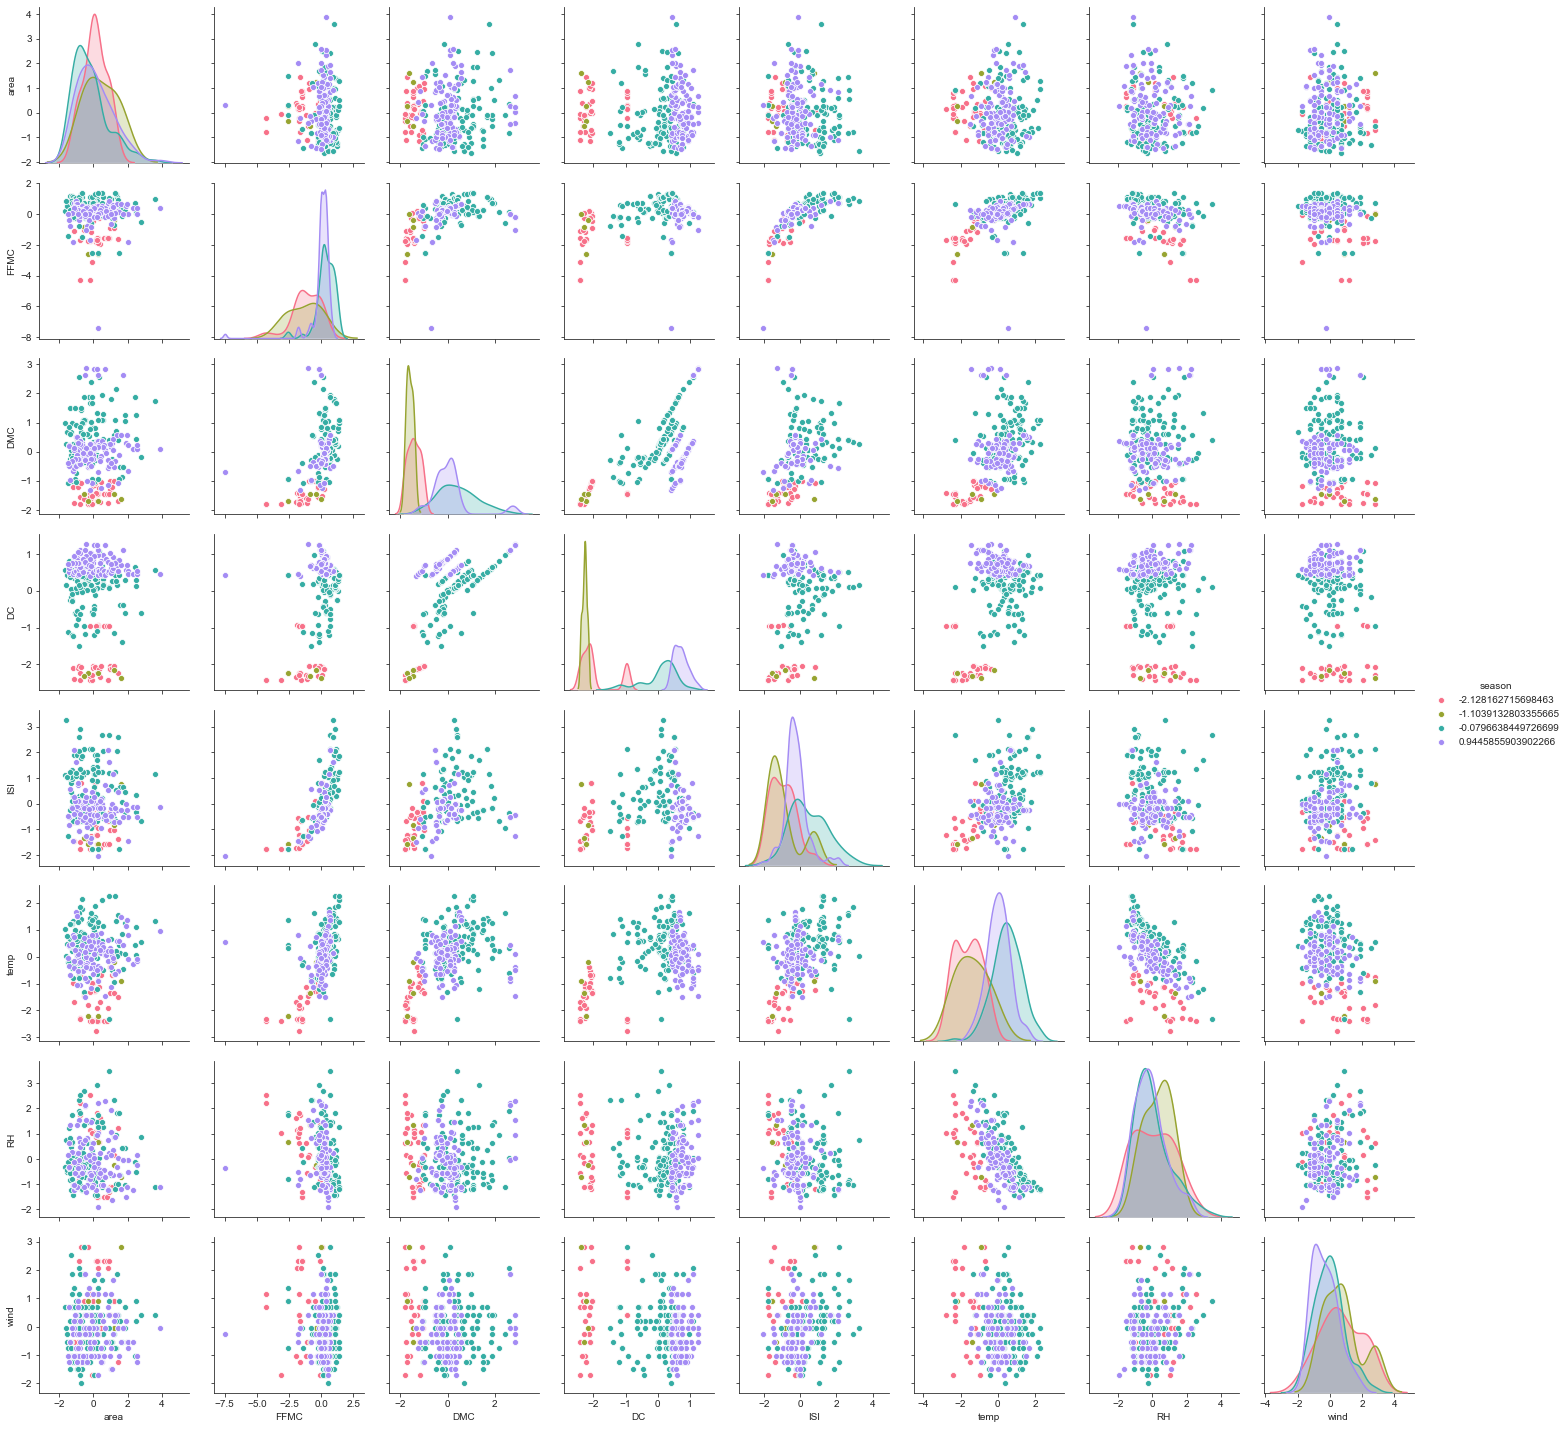

In [22]:
ds = sns.pairplot(data, hue = 'season', palette= 'husl', vars = ['area','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind'])
#по легеднде: чем ниже значение season, тем ближе к началу года

Линейная зависимость прослеживается в парах `DC` \ `DMC` и `FFMC` \ `ISI`. Уберем из рассмторения `DC`и `FFMC`

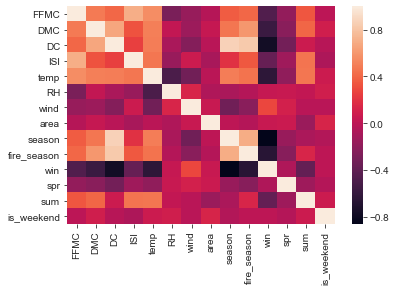

In [23]:
sns.heatmap(data.corr())

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Xs = data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','is_weekend']]
Xs['const'] = 1

C:\Users\dmitr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
vif = pd.DataFrame()
vif["Переменная"] = Xs.columns
vif["VIF"] = [variance_inflation_factor(Xs.values, i) for i in range(Xs.shape[1])]
vif

,Переменная,VIF
0,FFMC,2.692957
1,DMC,2.337799
2,DC,2.004969
3,ISI,2.391375
4,temp,2.779132
5,RH,1.675982
6,wind,1.271599
7,is_weekend,1.072133
8,const,1.000000


In [26]:
data=data.drop('season', axis=1)

In [27]:
from numpy import linalg as la
cn_matrix = data.values
cn = np.sqrt(la.cond(cn_matrix, 2)/la.cond(cn_matrix, -2))
cn

10.147924673680976

Готовим данные к регрессии

In [28]:
X = data.iloc[:, :].drop(['area'],axis = 1) #регрессоры
Y = data.iloc[:, 7] # зависимая переменная
X_ = sm.add_constant(X)

C:\Users\dmitr\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [29]:
reg = sm.OLS(Y, X_)
res = reg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   area   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     1.812
Date:                Sat, 20 Jun 2020   Prob (F-statistic):             0.0465
Time:                        20:08:32   Log-Likelihood:                -372.15
No. Observations:                 270   AIC:                             770.3
Df Residuals:                     257   BIC:                             817.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.214e-17      0.060  -2.03e-16      1.000      -0.118       0.118
FFMC           -0.0122      0.100     -0.122      0.903      -0.208       0.184
DMC             0.2438      0.103      2.372      0.018       0.041       0.446
DC             -0.1914      0.206     -0.930      0.353      -0.597       0.214
ISI            -0.0440      0.098     -0.447      0.655      -0.238       0.150
temp            0.0459      0.125      0.367      0.714      -0.200       0.292
RH             -0.0834      0.088     -0.942      0.347      -0.258       0.091
wind            0.0809      0.069      1.166      0.245      -0.056       0.217
fire_season    -0.0331      0.116     -0.287      0.775      -0.261       0.195
win            -0.0913      0.176     -0.520      0.604      -0.437       0.254
spr             0.0112      0.092      0.122      0.903      -0.169       0.192
sum            -0.2594      0.097     -2.669      0.008      -0.451      -0.068
is_weekend      0.1258      0.062      2.018      0.045       0.003       0.249
==============================================================================
Omnibus:                       29.497   Durbin-Watson:                   1.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.844
Skew:                           0.830   Prob(JB):                     1.65e-08
Kurtosis:                       3.657   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Попробуем LASSO

In [30]:
from sklearn.linear_model import Lasso, LassoLarsIC, LassoCV

lasso = Lasso(alpha = 0.05)
lasso.fit(X_, Y)
lasso.coef_

array([ 0.        , -0.        ,  0.03347881, -0.        , -0.        ,
        0.        , -0.01786504,  0.00538643, -0.        ,  0.        ,
        0.00854148, -0.11370528,  0.08605046])

In [31]:
X_.columns[(lasso.coef_)!=0]

Index(['DMC', 'RH', 'wind', 'spr', 'sum', 'is_weekend'], dtype='object')

In [32]:
pred = lasso.predict(X_).reshape(-1,1)
lasso.score(X_, Y)

0.04420200388757689

на выбранных переменных обычный OLS - ['DMC', 'RH', 'wind', 'spr', 'sum', 'is_weekend']

In [33]:
X = data.loc[:, ['DMC', 'RH','sum','is_weekend','wind','fire_season']] #убрали лишка
Y = data.iloc[:, 7] # зависимая переменная
#X_ = sm.add_constant(X)

In [34]:
reg = sm.OLS(Y, X)
res = reg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   area   R-squared (uncentered):                   0.070
Model:                            OLS   Adj. R-squared (uncentered):              0.049
Method:                 Least Squares   F-statistic:                              3.305
Date:                Sat, 20 Jun 2020   Prob (F-statistic):                     0.00374
Time:                        20:09:18   Log-Likelihood:                         -373.33
No. Observations:                 270   AIC:                                      758.7
Df Residuals:                     264   BIC:                                      780.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
DMC             0.1982      0.082      2.420      0.016       0.037       0.359
RH             -0.0857      0.060     -1.421      0.156      -0.204       0.033
sum            -0.2150      0.065     -3.286      0.001      -0.344      -0.086
is_weekend      0.1359      0.060      2.265      0.024       0.018       0.254
wind            0.0618      0.061      1.006      0.315      -0.059       0.183
fire_season    -0.1173      0.077     -1.529      0.128      -0.268       0.034
==============================================================================
Omnibus:                       33.150   Durbin-Watson:                   1.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.759
Skew:                           0.884   Prob(JB):                     8.55e-10
Kurtosis:                       3.764   Cond. No.                         2.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Проверим нормальность остатков

In [35]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sm.stats.stattools.jarque_bera(res.resid)
list(zip(name, test))

[('Jarque-Bera', 41.75869620333216),
 ('Chi^2 two-tail prob.', 8.55488810928977e-10),
 ('Skew', 0.8842811394108608),
 ('Kurtosis', 3.764245754251718)]

Вывод: не наблюдаем нормальное распределение остатков

#### Bootstrap

In [36]:
from sklearn.utils import resample
from matplotlib import pyplot as plt
features=['DMC', 'RH','sum','is_weekend','wind','fire_season']
XX=X.join(Y)
values=XX.values
n_iter=1000
n_size=int(len(data)*1)
stats =[[],[],[],[],[],[]]
for i in range(n_iter):
    train = resample(values, n_samples=n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    model = sm.OLS(train[:,-1], train[:,:-1])
    res=model.fit()
    for i,j in zip(stats, list(res.params)):
        i.append(j)

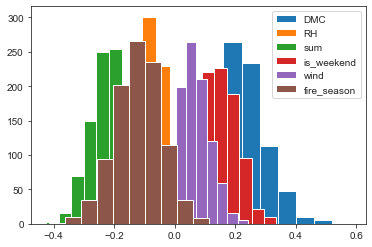

In [37]:
# plot betas
for elt,elts in zip(stats,features):
    plt.hist(elt, label=elts)
plt.legend(features)

In [38]:
# интервалы
for elt,elt1 in zip(stats, features):
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(elt, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(elt, p))
    print('for',elt1,'%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

for DMC 95.0 confidence interval 4.2% and 38.3%
for RH 95.0 confidence interval 0.0% and 2.1%
for sum 95.0 confidence interval 0.0% and -9.2%
for is_weekend 95.0 confidence interval 0.9% and 26.0%
for wind 95.0 confidence interval 0.0% and 17.2%
for fire_season 95.0 confidence interval 0.0% and 2.5%


In [39]:
X

,DMC,RH,sum,is_weekend,wind,fire_season
0,-1.076790,-0.115156,1.077033,-0.701222,-0.751145,-1.627467
1,0.239853,-0.380899,-0.928477,-0.701222,-1.016949,0.614452
2,0.191209,-0.314463,-0.928477,-0.701222,-1.229593,0.614452
3,-0.240105,-0.845950,1.077033,-0.701222,0.205753,0.614452
4,-0.108765,0.482767,1.077033,-0.701222,2.544835,0.614452
5,-1.028145,0.615639,1.077033,1.426081,0.684201,-1.627467
6,-0.240105,-0.779514,1.077033,-0.701222,0.684201,0.614452
7,0.275526,-1.443873,1.077033,-0.701222,-0.060052,0.614452
8,-1.216237,-0.248027,-0.928477,-0.701222,0.684201,-1.627467
9,-0.669798,-1.045258,-0.928477,-0.701222,-0.272696,0.614452


Прогнозируем

In [383]:
reg = sm.OLS(Y, X)
res = reg.fit()
#для средних
m=[]
for i in features:
    m.append(np.median(X[i]))
print(np.exp(res.predict(m))-1, 'area for mean features')
#точечный
print(np.exp(res.predict([1, 1, 0, -0.7, 3, 0.6]))-1, 'area for random features')

[0.03504851] area for mean features
[0.1414779] area for random features


Переходим к проверке гетероскедастичности

C:\Users\dmitr\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\Users\dmitr\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\dmitr\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


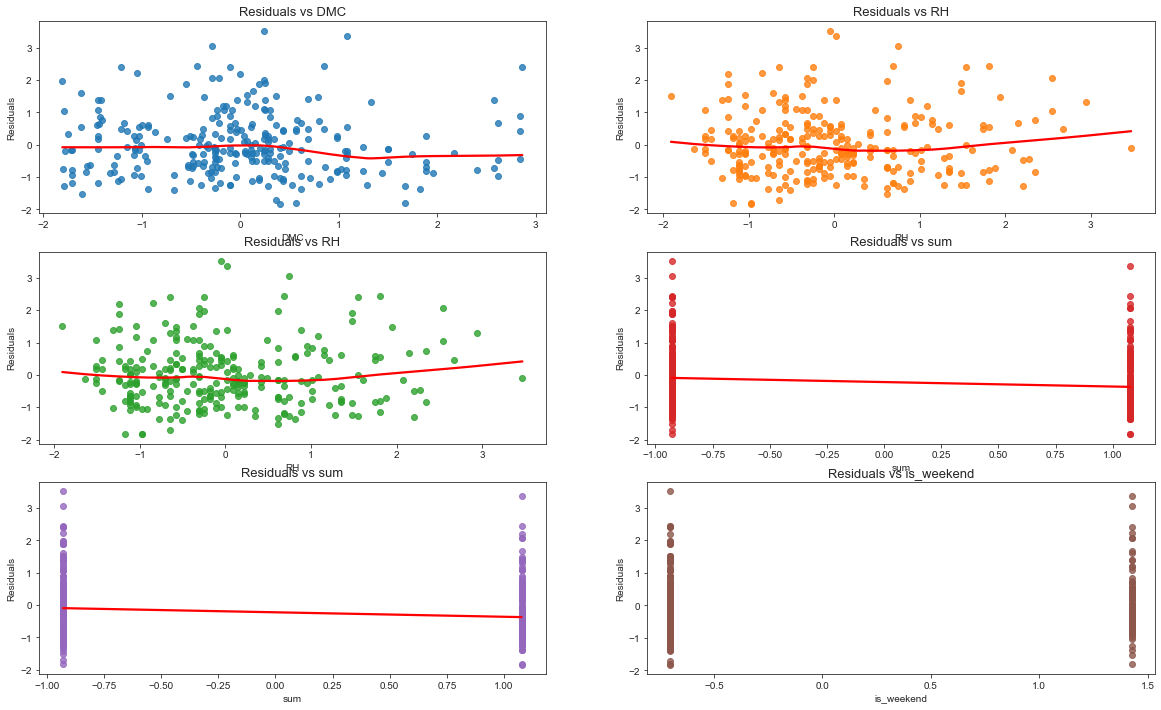

In [40]:
sns.mpl.rcParams['figure.figsize'] = (20.0, 12.0)
fig, ax = plt.subplots(3,2)
resids = res.resid
for i in range(3):
    for j in range(2):
        sns.regplot(x=X[features[i+j]], y=resids, lowess=True, ax=ax[i][j], line_kws={'color': 'red'})
        ax[i][j].set_title('Residuals vs '+features[i+j], fontsize=13)
        ax[i][j].set(xlabel=features[i+j], ylabel='Residuals')

Номер 7

P.S.: some lines of code might have been taken from [https://www.machinelearningmastery.ru/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0/]


 Goldfeld-Quandt test
                value
F statistic  0.954861
p-value      0.603256

 Residuals plots


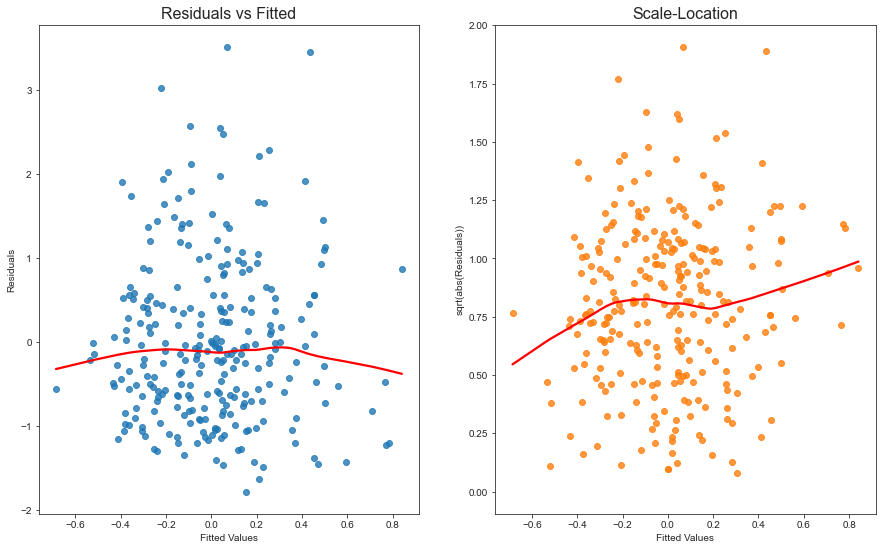

In [277]:
import statsmodels.stats.api as sms
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)
def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Goldfeld-Quandt test.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.fittedvalues
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')
    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Goldfeld-Quandt test' )
    print(gq_test)
    print('\n Residuals plots')

homoscedasticity_test(res)

### Номер 10

In [280]:
from sklearn.decomposition import PCA

Т.е. чтобы объяснить 90% дисперсии, нам достаточно взять 4 главные компоненты.
Далее ответим на вопрос, сколько процентов диспрессии объясняют первые 2 компоненты

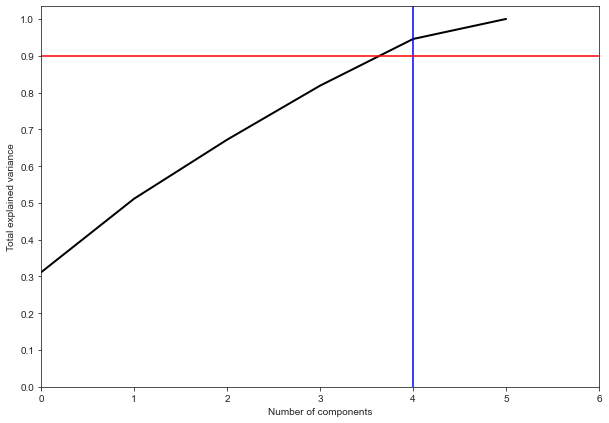

In [426]:
pca = PCA().fit(X)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 6)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(4, c='b')
plt.axhline(0.9, c='r')
plt.show();

In [427]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,X.columns)))

1 component: 31.12% of initial variance
-0.646 x DMC + 0.020 x RH + -0.402 x sum + -0.110 x is_weekend + 0.262 x wind + -0.584 x fire_season
2 component: 20.0% of initial variance
0.096 x DMC + 0.648 x RH + 0.316 x sum + 0.434 x is_weekend + 0.508 x wind + -0.156 x fire_season
3 component: 16.05% of initial variance
-0.126 x DMC + -0.054 x RH + -0.249 x sum + 0.828 x is_weekend + -0.479 x wind + -0.062 x fire_season
4 component: 14.69% of initial variance
0.040 x DMC + 0.668 x RH + -0.592 x sum + -0.219 x is_weekend + -0.201 x wind + 0.337 x fire_season
5 component: 12.69% of initial variance
-0.166 x DMC + 0.359 x RH + 0.487 x sum + -0.250 x is_weekend + -0.634 x wind + -0.377 x fire_season
6 component: 5.45% of initial variance
0.727 x DMC + -0.032 x RH + -0.298 x sum + -0.057 x is_weekend + -0.052 x wind + -0.613 x fire_season


То есть первые две компоненты объясняют

In [428]:
print('First two components:{}% of initial variance'.format(round(100*sum(pca.explained_variance_ratio_[:2]),2)))

First two components:51.12% of initial variance


Давайте строить регрессию по первым двум компонентам.

In [429]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [430]:
reg_pca = sm.OLS(Y, X_pca)
res_pca = reg_pca.fit()
res_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   area   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.1782
Date:                Sat, 20 Jun 2020   Prob (F-statistic):              0.837
Time:                        19:29:35   Log-Likelihood:                -382.93
No. Observations:                 270   AIC:                             769.9
Df Residuals:                     268   BIC:                             777.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0265      0.045      0.592      0.554      -0.061       0.114
x2             0.0042      0.056      0.075      0.940      -0.106       0.114
==============================================================================
Omnibus:                       34.868   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.744
Skew:                           0.907   Prob(JB):                     1.92e-10
Kurtosis:                       3.830   Cond. No.                         1.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Краткие выводы: в случае выбранных переменных брать лишь первые две PC явно недостаточно, так как они объясняют лишь `50%` процентов дисперссии, что уже очень мало. Однако если брать хотя бы 4 из 6 компонент, то возможно покрыть 90% диспрессии, как показано выше. Тем не менее, эти две новые переменные не значимы, более того `R^2` стал ещё меньше, поэтому объясняющая способность модели упала. 